In [59]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os, time
from skimage.feature import hog

In [18]:
#reading data
dataset = []
target = []
main_dir = './Dataset/'
catagories = os.listdir(main_dir)

for catagory in catagories:
    path = os.path.join(main_dir, catagory)
    for image_path in os.listdir(path):
        full_path = os.path.join(path, image_path)
        image = cv2.imread(full_path,0)
        resized = cv2.resize(image, (150,150))
        flatten = resized.flatten()  #ravel
        dataset.append(flatten)
        lbl = catagories.index(catagory)
        target.append(lbl)
        
        
        
X = np.array(dataset)
y = np.array(target)
print(f'shape of X:\t\t{X.shape}\n shapw of y:\t\t{y.shape}')

shape of X:		(100, 22500)
 shapw of y:		(100,)


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train shape:\t{X_train.shape}\nX_test shape: {X_test.shape}\n')
print(f'y_train shape:\t{y_train.shape}\ny_test shape: {y_test.shape}\n')

X_train shape:	(80, 22500)
X_test shape: (20, 22500)

y_train shape:	(80,)
y_test shape: (20,)



In [29]:
#ftiiting some classifer
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
st = time.time()
cls.fit(X=X_train, y=y_train)
print(time.time()-st)

2.6893866062164307


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


result = cls.predict(X=X_test)
result

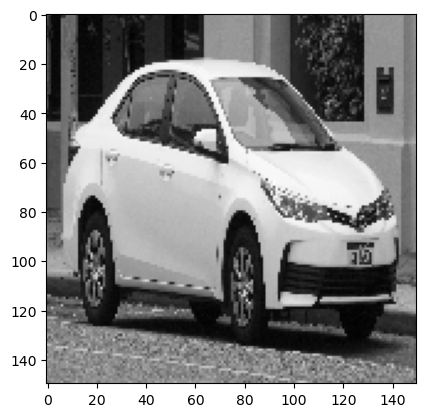

In [35]:
plt.imshow(X_test[15].reshape(150,150), 'gray')

In [37]:
cls.score(X_test, result)

1.0

In [46]:
from sklearn.svm import SVC
s_cls = SVC()
st = time.time()
s_cls.fit(X_train, y_train)
time.time()-st

0.17699885368347168

In [47]:
preds = s_cls.predict(X_test)

In [48]:
preds

array([2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 2, 0, 0])

In [49]:
catagories[preds[0]]

'Ice cream cone'

In [54]:
s_cls.score(X_test, preds)

1.0

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test)
cm

array([[10,  0,  0],
       [ 0,  3,  0],
       [ 0,  0,  7]], dtype=int64)

In [58]:
catagories

['Cars', 'Cricket ball', 'Ice cream cone']

In [63]:
#reading data
dataset = []
target = []
main_dir = './Dataset/'
catagories = os.listdir(main_dir)

for catagory in catagories:
    path = os.path.join(main_dir, catagory)
    for image_path in os.listdir(path):
        full_path = os.path.join(path, image_path)
        image = cv2.imread(full_path,0)
        resized = cv2.resize(image, (150,150))
        feat = hog(resized)
        print(feat.shape)
        dataset.append(feat)
        lbl = catagories.index(catagory)
        target.append(lbl)
        break
        
        
        
X = np.array(dataset)
y = np.array(target)
print(f'shape of X:\t\t{X.shape}\n shape of y:\t\t{y.shape}')

(20736,)
(20736,)
(20736,)
shape of X:		(3, 20736)
 shapw of y:		(3,)
